In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name ={'orders':'olist_orders_dataset',
            'order_items':'olist_order_items_dataset',
            'products':'olist_products_dataset',
            'eng_product_cate':'product_category_name_translation',
            'customers': 'olist_customers_dataset',
            'sellers': 'olist_sellers_dataset',
            'payments':'olist_order_payments_dataset',
            'reviews':'olist_order_reviews_dataset',
            'geolocation':'olist_geolocation_dataset'}
for name in file_name.keys(): locals()[name] = pd.read_csv(file_name[name]+'.csv')
dataset_name = file_name.keys()
df_columns_name = pd.DataFrame([globals()[i].columns for i in dataset_name], index = dataset_name).T
df_columns_name

,orders,order_items,products,eng_product_cate,customers,sellers,payments,reviews,geolocation
0,order_id,order_id,product_id,product_category_name,customer_id,seller_id,order_id,review_id,geolocation_zip_code_prefix
1,customer_id,order_item_id,product_category_name,product_category_name_english,customer_unique_id,seller_zip_code_prefix,payment_sequential,order_id,geolocation_lat
2,order_status,product_id,product_name_lenght,None,customer_zip_code_prefix,seller_city,payment_type,review_score,geolocation_lng
3,order_purchase_timestamp,seller_id,product_description_lenght,None,customer_city,seller_state,payment_installments,review_comment_title,geolocation_city
4,order_approved_at,shipping_limit_date,product_photos_qty,None,customer_state,None,payment_value,review_comment_message,geolocation_state
5,order_delivered_carrier_date,price,product_weight_g,None,None,None,None,review_creation_date,None
6,order_delivered_customer_date,freight_value,product_length_cm,None,None,None,None,review_answer_timestamp,None
7,order_estimated_delivery_date,None,product_height_cm,None,None,None,None,None,None
8,None,None,product_width_cm,None,None,None,None,None,None


In [8]:
retail = orders.merge(order_items, on='order_id')\
        .merge(products, on='product_id')\
        .merge(eng_product_cate, on='product_category_name')\
        .merge(customers, on='customer_id')\
        .merge(sellers, on='seller_id').merge(payments, on='order_id')\
        .merge(reviews, on='order_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
#.merge(geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix').

In [9]:
retail.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.580054,-46.586673,sao paulo,SP


In [10]:
retail.shape

(17658865, 45)

In [44]:
retail.isnull().sum(axis=0)/len(retail)*100

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012110
order_delivered_carrier_date      1.033657
order_delivered_customer_date     2.075963
order_estimated_delivery_date     0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_value                     0.000000
product_category_name             0.000000
product_name_lenght               0.000000
product_description_lenght        0.000000
product_photos_qty                0.000000
product_weight_g                  0.000865
product_length_cm                 0.000865
product_height_cm                 0.000865
product_width_cm                  0.000865
product_category_name_english     0.000000
customer_un

In [45]:
retail.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
retail.shape

(113194, 40)

In [46]:
retail.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
customer_unique_id                object
customer_zip_cod

In [47]:
retail.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max']]

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score
mean,1.195063,119.862677,20.002657,48.802993,784.727892,2.20684,2106.236075,30.278091,16.597422,23.099679,35086.173984,24525.984619,1.090818,2.943743,171.573731,4.082513
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.00000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.00000,300.000000,18.000000,8.000000,15.000000,11310.000000,6429.000000,1.000000,1.000000,60.850000,4.000000
50%,1.000000,74.900000,16.320000,52.000000,600.000000,1.00000,700.000000,25.000000,13.000000,20.000000,24315.000000,13660.000000,1.000000,2.000000,107.970000,5.000000
75%,1.000000,132.980000,21.190000,57.000000,982.000000,3.00000,1800.000000,38.000000,20.000000,30.000000,58865.000000,28495.000000,1.000000,4.000000,189.157500,5.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.00000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000,26.000000,24.000000,13664.080000,5.000000


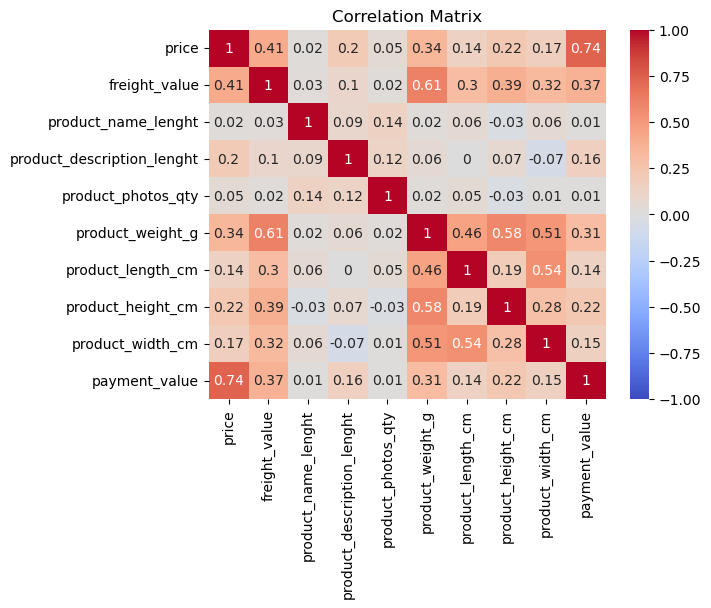

In [48]:
retail_numerical = retail.select_dtypes(include=['float64'])
corr = np.round(retail_numerical.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

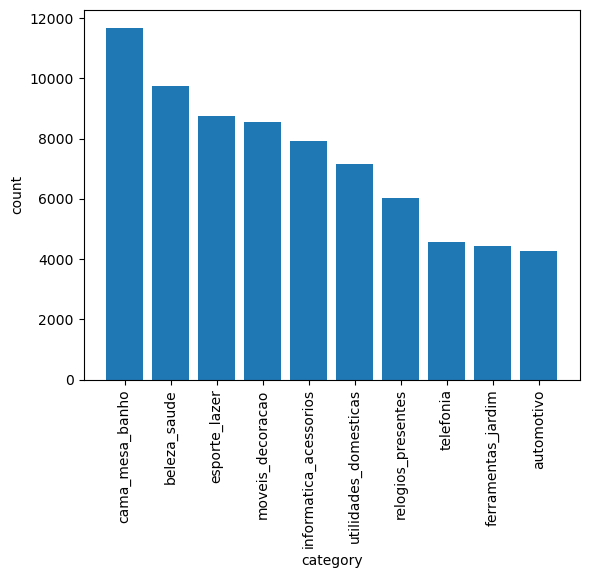

In [49]:
result = retail.groupby('product_category_name')['order_id'].count().reset_index().sort_values('order_id', ascending=False).head(10)
plt.bar(result['product_category_name'], result['order_id'])
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('count')
plt.show()